<a href="https://colab.research.google.com/github/Gxwthmmmm/Forest-ecosystem-prediction-model---Python/blob/main/forest_ecosystem_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

State after 1 step: [6. 1. 3.]
State after 5 steps: [2.621  2.2223 5.1567]
Steady-state distribution: [0.24561404 0.22807018 0.52631579]
ML Transition Model Accuracy: 0.38
Predicted next state: [2]


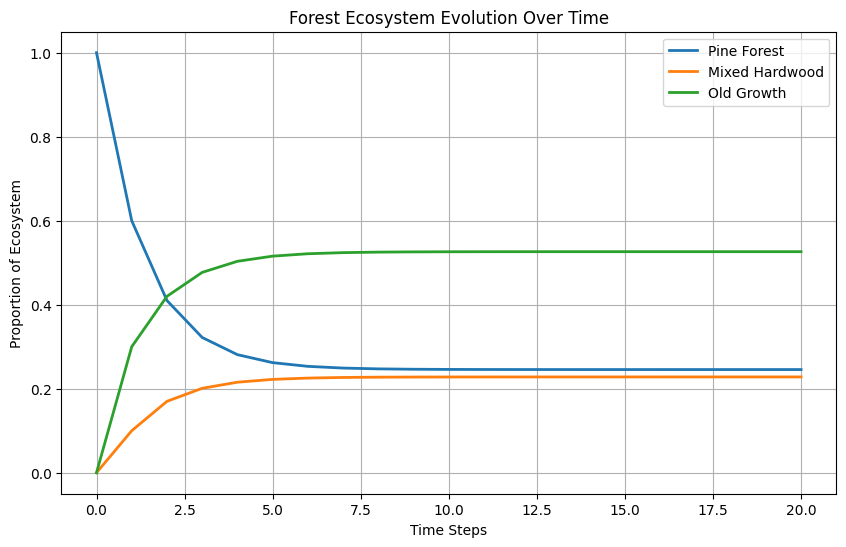

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Define initial Markov Transition Matrix (from your notes)
P_fixed = np.array([
    [0.6, 0.1, 0.3],  # Pine Forest
    [0.2, 0.2, 0.6],  # Mixed Hardwood
    [0.1, 0.3, 0.6]   # Old Growth
])

# Step 2: Function for Markov state transition
def markov_step(x0, P, steps=1):
    x = x0.copy()
    for _ in range(steps):
        x = P.T @ x
    return x

# Example: initial state vector (10 units in Pine, 0 elsewhere)
x0 = np.array([10, 0, 0])

print("State after 1 step:", markov_step(x0, P_fixed, steps=1))
print("State after 5 steps:", markov_step(x0, P_fixed, steps=5))

# Step 3: Steady-state calculation
def steady_state(P):
    eigvals, eigvecs = np.linalg.eig(P.T)
    stat_dist = np.real(eigvecs[:, np.isclose(eigvals, 1)])
    stat_dist = stat_dist[:, 0]
    stat_dist = stat_dist / np.sum(stat_dist)
    return stat_dist

print("Steady-state distribution:", steady_state(P_fixed))

# -------------------------
# Step 4: ML part: Predict transition states dynamically
# -------------------------

# Load example real-world-ish dataset
# For illustration, we simulate data but this is where real data would go
np.random.seed(42)
data = pd.DataFrame({
    'temperature': np.random.normal(15, 5, 500),
    'rainfall': np.random.normal(100, 20, 500),
    'human_activity': np.random.randint(0, 2, 500),  # 0=low, 1=high
    'current_state': np.random.randint(0, 3, 500),  # 0=Pine, 1=Mixed, 2=Old Growth
    'next_state': np.random.randint(0, 3, 500)
})

# Step 5: Train ML model (Random Forest)
X = data[['temperature', 'rainfall', 'human_activity', 'current_state']]
y = data['next_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate model
preds = model.predict(X_test)
print("ML Transition Model Accuracy:", accuracy_score(y_test, preds))

# Step 7: Predict transition probability for new input
sample_input = pd.DataFrame({
    'temperature': [18],
    'rainfall': [90],
    'human_activity': [1],
    'current_state': [0]  # Pine
})
predicted_next_state = model.predict(sample_input)
print("Predicted next state:", predicted_next_state)

# -------------------------
# Step 8: Visualization: Forest Ecosystem Evolution Over Time
# -------------------------

def simulate_evolution(initial_state, steps, P):
    history = [initial_state]
    state = initial_state.copy()
    for _ in range(steps):
        state = P.T @ state
        history.append(state)
    return np.array(history)

# Simulate 20 steps
history = simulate_evolution(x0 / np.sum(x0), steps=20, P=P_fixed)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(history[:, 0], label='Pine Forest', linewidth=2)
plt.plot(history[:, 1], label='Mixed Hardwood', linewidth=2)
plt.plot(history[:, 2], label='Old Growth', linewidth=2)
plt.title('Forest Ecosystem Evolution Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Proportion of Ecosystem')
plt.legend()
plt.grid(True)
plt.show()


